In [1]:
import pickle
import os
from PIL import Image

In [2]:
# Authenticate.
from google.colab import auth
auth.authenticate_user()

# Install Cloud Storage FUSE.
!echo "deb https://packages.cloud.google.com/apt gcsfuse-`lsb_release -c -s` main" | sudo tee /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -
!apt -qq update && apt -qq install gcsfuse

deb https://packages.cloud.google.com/apt gcsfuse-jammy main
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2659  100  2659    0     0  10843      0 --:--:-- --:--:-- --:--:-- 10853
OK
19 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: https://packages.cloud.google.com/apt/dists/gcsfuse-jammy/InRelease: Key is stored in legacy trusted.gpg keyring (/etc/apt/trusted.gpg), see the DEPRECATION section in apt-key(8) for details.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 5,561 kB of archives.
After this operation, 0 B of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 120882 files and directories currently installed.)
Preparing to unpack .../gcsfuse_1.2.1_amd64.deb ...
Unpacking gcsfuse (1.2.1) ...
Setting up 

You can mount an entire bucket, or a path location within that bucket.
The local path to mount it must exist.

In [3]:
# Mount a Cloud Storage bucket or location, without the gs:// prefix.
mount_path = "picture_embeddings/combined_embeddings"  # or a location like "my-bucket/path/to/mount"
local_path = f"/mnt/gs/{mount_path}"

!mkdir -p {local_path}
!gcsfuse --implicit-dirs {mount_path} {local_path}

{"time":"30/11/2023 10:30:16.927309","severity":"INFO","msg":"Start gcsfuse/1.2.1 (Go version go1.21.3) for app \"\" using mount point: /mnt/gs/picture_embeddings/combined_embeddings\n"}
daemonize.Run: readFromProcess: sub-process: mountWithArgs: mountWithStorageHandle: fs.NewServer: create file system: SetUpBucket: Error in iterating through objects: storage: bucket doesn't exist


In [4]:
mount_path = 'brats-image-files-eu'
local_path = f"/mnt/gs/{mount_path}"

!mkdir -p {local_path}
!gcsfuse --implicit-dirs {mount_path} {local_path}

{"time":"30/11/2023 10:30:17.850900","severity":"INFO","msg":"Start gcsfuse/1.2.1 (Go version go1.21.3) for app \"\" using mount point: /mnt/gs/brats-image-files-eu\n"}


In [5]:
# Then you can access it like a local path.
!ls -lh {local_path}

total 0
drwxr-xr-x 1 root root 0 Nov 30 10:30 ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData
drwxr-xr-x 1 root root 0 Nov 30 10:30 ASNR-MICCAI-BraTS2023-MET-Challenge-TrainingData
drwxr-xr-x 1 root root 0 Nov 30 10:30 ASNR-MICCAI-BraTS2023-PED-Challenge-TrainingData
drwxr-xr-x 1 root root 0 Nov 30 10:30 ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2
drwxr-xr-x 1 root root 0 Nov 30 10:30 BraTS-MEN-Train


In [6]:
!gcloud storage cp gs://picture_embeddings/combined_embeddings/100_ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData_embeddings.pickle    /mnt/gs/picture_embeddings/combined_embeddings
!gcloud storage cp gs://picture_embeddings/combined_embeddings/100_ASNR-MICCAI-BraTS2023-MET-Challenge-TrainingData_embedding.pickle     /mnt/gs/picture_embeddings/combined_embeddings
!gcloud storage cp gs://picture_embeddings/combined_embeddings/100_ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2_embedding.pickle  /mnt/gs/picture_embeddings/combined_embeddings
!gcloud storage cp gs://picture_embeddings/combined_embeddings/100_BraTS-MEN-Train_embedding.pickle                                      /mnt/gs/picture_embeddings/combined_embeddings
!gcloud storage cp gs://picture_embeddings/combined_embeddings/100_ASNR-MICCAI-BraTS2023-PED-Challenge-TrainingData_embedding.pickle /mnt/gs/picture_embeddings/combined_embeddings

Copying gs://picture_embeddings/combined_embeddings/100_ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData_embeddings.pickle to file:///mnt/gs/picture_embeddings/combined_embeddings/100_ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData_embeddings.pickle

Average throughput: 31.3MiB/s
Copying gs://picture_embeddings/combined_embeddings/100_ASNR-MICCAI-BraTS2023-MET-Challenge-TrainingData_embedding.pickle to file:///mnt/gs/picture_embeddings/combined_embeddings/100_ASNR-MICCAI-BraTS2023-MET-Challenge-TrainingData_embedding.pickle

Average throughput: 30.9MiB/s
Copying gs://picture_embeddings/combined_embeddings/100_ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2_embedding.pickle to file:///mnt/gs/picture_embeddings/combined_embeddings/100_ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2_embedding.pickle

Average throughput: 26.0MiB/s
Copying gs://picture_embeddings/combined_embeddings/100_BraTS-MEN-Train_embedding.pickle to file:///mnt/gs/picture_embeddings/combined_embeddings/100_Br

In [7]:
with open ('/mnt/gs/picture_embeddings/combined_embeddings/100_ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData_embeddings.pickle', 'rb') as handle:
  gli_embeddings = pickle.load(handle)

with open('/mnt/gs/picture_embeddings/combined_embeddings/100_ASNR-MICCAI-BraTS2023-MET-Challenge-TrainingData_embedding.pickle', 'rb') as handle:
  met_embeddings = pickle.load(handle)

with open('/mnt/gs/picture_embeddings/combined_embeddings/100_BraTS-MEN-Train_embedding.pickle', 'rb') as handle:
  men_embeddings = pickle.load(handle)

with open('/mnt/gs/picture_embeddings/combined_embeddings/100_ASNR-MICCAI-BraTS2023-PED-Challenge-TrainingData_embedding.pickle', 'rb') as handle:
  ped_embeddings = pickle.load(handle)

with open('/mnt/gs/picture_embeddings/combined_embeddings/100_ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2_embedding.pickle', 'rb') as handle:
  ssa_embeddings = pickle.load(handle)



In [8]:
len(gli_embeddings), len(met_embeddings), len(men_embeddings), len(ped_embeddings), len(ssa_embeddings)

(100, 100, 100, 99, 60)

In [9]:
### Combine embeddings
all_embeddings = {**gli_embeddings, **met_embeddings, **men_embeddings, **ped_embeddings, **ssa_embeddings}

In [10]:
len(all_embeddings)

459

In [15]:
all_embeddings[list(all_embeddings.keys())[0]]['bucket_url']

'gs://brats-image-files-eu/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/'

In [16]:
from pathlib import Path
from IPython.display import display

# 'gs://' -> '/mnt/gs'
for key in all_embeddings.keys():


  try:
    local_path = all_embeddings[key]['bucket_url'].replace('gs://', '/mnt/gs/')
  except:
    print(all_embeddings[key]['bucket_url'])

  local_path_png_folder = Path(local_path) / 'png'
  all_embeddings[key]['local_path_png_folder'] = local_path_png_folder



In [17]:
all_embeddings[list(all_embeddings.keys())[0]]['bucket_url'], all_embeddings[list(all_embeddings.keys())[0]]['local_path_png_folder']

('gs://brats-image-files-eu/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/',
 PosixPath('/mnt/gs/brats-image-files-eu/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/png'))

In [18]:
all_embeddings[list(all_embeddings.keys())[-1]]['bucket_url'], all_embeddings[list(all_embeddings.keys())[-1]]['local_path_png_folder']

('gs://brats-image-files-eu/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00230-000/',
 PosixPath('/mnt/gs/brats-image-files-eu/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00230-000/png'))

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
from numpy import dot
from numpy.linalg import norm

def cosine_similarity(a, b):
  return dot(a, b)/(norm(a)*norm(b))

def print_cosine_similarity(embedding_a, embedding_b):
  cos = cosine_similarity(embedding_a, embedding_b)
  result = f'Cosine similarity = {cos:.2f}'
  print(result)

def show_pair(imag_a, imag_b):
  plt.subplot(121)
  plt.imshow(np.array(imag_a))
  plt.axis("off")

  plt.subplot(122)
  plt.imshow(np.array(imag_b))
  plt.axis("off")

In [20]:
all_embeddings[list(all_embeddings.keys())[-1]].keys()

dict_keys(['pat_id', 'bucket_url', 'origin_ds', 'diagnose', 'embeddings', 'local_path_png_folder'])

In [21]:
all_embeddings[list(all_embeddings.keys())[-1]]['embeddings'].keys()

dict_keys(['slice_id', 'RESNET50_MEDCLIP', 'VIT_MEDCLIP', 'RESNET50_IMAGENET', 'RESNET152_IMAGENET'])

In [22]:
all_embeddings[list(all_embeddings.keys())[-1]]['embeddings']['RESNET152_IMAGENET']

{'t1': array([0.15853655, 0.5389093 , 0.29088667, ..., 0.05158063, 0.45453832,
        0.07438308], dtype=float32),
 'seg_t1': array([0.11387411, 0.5854073 , 0.2111382 , ..., 0.01186825, 0.28587678,
        0.03618363], dtype=float32),
 't1c': array([0.21818325, 0.71957135, 0.52544993, ..., 0.06891111, 0.8292475 ,
        0.07737286], dtype=float32),
 'seg_t1c': array([0.11270266, 0.5435987 , 0.2248193 , ..., 0.1300241 , 0.43794477,
        0.2188555 ], dtype=float32),
 't2': array([0.15381424, 0.5584608 , 0.01414477, ..., 0.10458863, 0.6605924 ,
        0.08000058], dtype=float32),
 'seg_t2': array([0.12439153, 0.37761748, 0.01124703, ..., 0.02226332, 0.20661794,
        0.05484027], dtype=float32),
 'flair': array([0.2732519 , 0.59250706, 0.7528824 , ..., 0.33208528, 0.4198326 ,
        0.01425757], dtype=float32),
 'seg_flair': array([0.21145087, 0.44687676, 0.2880261 , ..., 0.07796133, 0.29220366,
        0.17427777], dtype=float32)}

In [23]:
print_cosine_similarity(all_embeddings[list(all_embeddings.keys())[-1]]['embeddings']['RESNET152_IMAGENET']['t1'], all_embeddings[list(all_embeddings.keys())[-1]]['embeddings']['RESNET152_IMAGENET']['seg_t1'])

Cosine similarity = 0.75


In [24]:
os.listdir(all_embeddings[list(all_embeddings.keys())[-1]]['local_path_png_folder'])

['BraTS-SSA-00230-000_flair_sliced.png',
 'BraTS-SSA-00230-000_seg_flair_sliced.png',
 'BraTS-SSA-00230-000_seg_t1_sliced.png',
 'BraTS-SSA-00230-000_seg_t1c_sliced.png',
 'BraTS-SSA-00230-000_seg_t2_sliced.png',
 'BraTS-SSA-00230-000_t1_sliced.png',
 'BraTS-SSA-00230-000_t1c_sliced.png',
 'BraTS-SSA-00230-000_t2_sliced.png']

In [27]:
'BraTS-SSA-00230-000_t1_sliced.png', 'BraTS-SSA-00230-000_seg_t1_sliced.png'

('BraTS-SSA-00230-000_t1_sliced.png', 'BraTS-SSA-00230-000_seg_t1_sliced.png')

In [28]:
print_cosine_similarity(all_embeddings[list(all_embeddings.keys())[-1]]['embeddings']['RESNET152_IMAGENET']['t2'], all_embeddings[list(all_embeddings.keys())[-1]]['embeddings']['RESNET152_IMAGENET']['seg_t2'])

Cosine similarity = 0.80


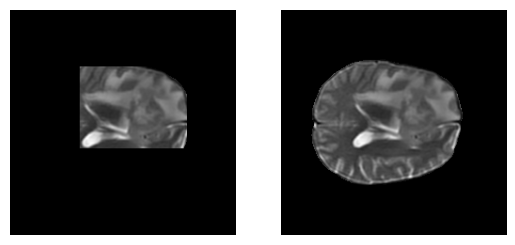

In [29]:
imag_a = Image.open(Path('/mnt/gs/brats-image-files-eu/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2') / 'BraTS-SSA-00230-000' / 'png' / 'BraTS-SSA-00230-000_seg_t2_sliced.png')
imag_b = Image.open(Path('/mnt/gs/brats-image-files-eu/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2') / 'BraTS-SSA-00230-000' / 'png' / 'BraTS-SSA-00230-000_t2_sliced.png')
show_pair(imag_a, imag_b)

In [31]:
print_cosine_similarity(all_embeddings[list(all_embeddings.keys())[-1]]['embeddings']['RESNET152_IMAGENET']['flair'], all_embeddings[list(all_embeddings.keys())[-1]]['embeddings']['RESNET152_IMAGENET']['seg_flair'])

Cosine similarity = 0.83


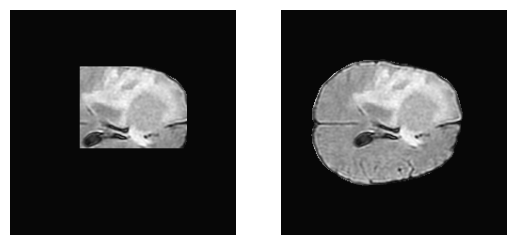

In [32]:
imag_a = Image.open(Path('/mnt/gs/brats-image-files-eu/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2') / 'BraTS-SSA-00230-000' / 'png' / 'BraTS-SSA-00230-000_seg_flair_sliced.png')
imag_b = Image.open(Path('/mnt/gs/brats-image-files-eu/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2') / 'BraTS-SSA-00230-000' / 'png' / 'BraTS-SSA-00230-000_flair_sliced.png')
show_pair(imag_a, imag_b)

In [33]:
print_cosine_similarity(all_embeddings[list(all_embeddings.keys())[-1]]['embeddings']['RESNET152_IMAGENET']['t1c'], all_embeddings[list(all_embeddings.keys())[-1]]['embeddings']['RESNET152_IMAGENET']['seg_t1c'])

Cosine similarity = 0.85


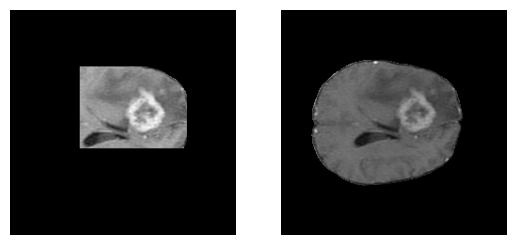

In [34]:
imag_a = Image.open(Path('/mnt/gs/brats-image-files-eu/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2') / 'BraTS-SSA-00230-000' / 'png' / 'BraTS-SSA-00230-000_seg_t1c_sliced.png')
imag_b = Image.open(Path('/mnt/gs/brats-image-files-eu/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2') / 'BraTS-SSA-00230-000' / 'png' / 'BraTS-SSA-00230-000_t1c_sliced.png')
show_pair(imag_a, imag_b)

In [35]:
print_cosine_similarity(all_embeddings[list(all_embeddings.keys())[-1]]['embeddings']['RESNET152_IMAGENET']['t1'], all_embeddings[list(all_embeddings.keys())[-1]]['embeddings']['RESNET152_IMAGENET']['t2'])

Cosine similarity = 0.87


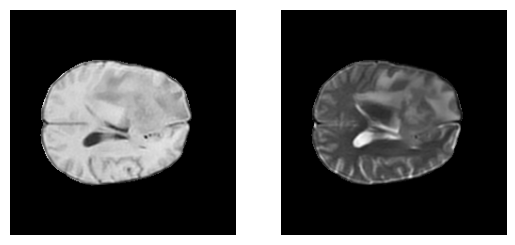

In [36]:
imag_a = Image.open(Path('/mnt/gs/brats-image-files-eu/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2') / 'BraTS-SSA-00230-000' / 'png' / 'BraTS-SSA-00230-000_t1_sliced.png')
imag_b = Image.open(Path('/mnt/gs/brats-image-files-eu/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2') / 'BraTS-SSA-00230-000' / 'png' / 'BraTS-SSA-00230-000_t2_sliced.png')
show_pair(imag_a, imag_b)

In [37]:
print_cosine_similarity(all_embeddings[list(all_embeddings.keys())[-1]]['embeddings']['RESNET152_IMAGENET']['seg_t1'], all_embeddings[list(all_embeddings.keys())[-1]]['embeddings']['RESNET152_IMAGENET']['seg_t2'])

Cosine similarity = 0.85


In [39]:
X = []
images = []

map_folders = {
    'BraTS-MET':  '/mnt/gs/brats-image-files-eu/ASNR-MICCAI-BraTS2023-MET-Challenge-TrainingData' ,
    'BraTS-GLI': '/mnt/gs/brats-image-files-eu/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData',
    'BraTS-MEN': '/mnt/gs/brats-image-files-eu/BraTS-MEN-Train',
    'BraTS-PED': '/mnt/gs/brats-image-files-eu/ASNR-MICCAI-BraTS2023-PED-Challenge-TrainingData',
    'BraTS-SSA' : '/mnt/gs/brats-image-files-eu/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2'

}

# images should have a path for pat_id - slice number - and modality
for uuid, values in all_embeddings.items():
  image_parent_path = Path(all_embeddings[uuid]['pat_id'])
  for image_mod, vector in all_embeddings[uuid]['embeddings']['RESNET152_IMAGENET'].items():
    suffix = f"_{image_mod}_sliced.png"
    image_path = Path(str(image_parent_path) + suffix)
    X.append(vector)
    local_root_path = Path(map_folders[str(image_path)[:9]]) /  all_embeddings[uuid]['pat_id'] / 'png'
    local_image_path = local_root_path / image_path
    images.append(local_image_path)


In [40]:
print_cosine_similarity(X[-1], X[-2])

Cosine similarity = 0.83


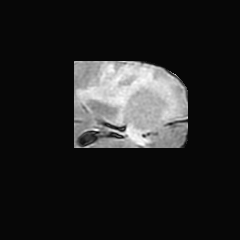

In [41]:
Image.open(images[-1])

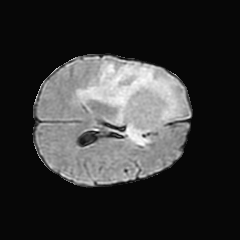

In [42]:
Image.open(images[-2])

In [43]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=9, metric='cosine').fit(X)
nbrs

NearestNeighbors(metric='cosine', n_neighbors=9)

In [45]:
# Get the distances between neighbohoods and the indices of similarity
neighbor_distances, neighbor_indices = nbrs.kneighbors(X)
neighbor_similarities = 1 - neighbor_distances
neighbor_similarities, neighbor_indices

(array([[1.        , 0.9564613 , 0.9527305 , ..., 0.9465253 , 0.9461858 ,
         0.9460927 ],
        [1.        , 0.96041805, 0.9594122 , ..., 0.9528137 , 0.9523976 ,
         0.95095694],
        [1.        , 0.9455893 , 0.9422977 , ..., 0.93401605, 0.93171036,
         0.931473  ],
        ...,
        [1.        , 0.945882  , 0.9355773 , ..., 0.916674  , 0.9160366 ,
         0.91512996],
        [1.        , 0.92075187, 0.91394943, ..., 0.90090996, 0.9004339 ,
         0.8985332 ],
        [0.9999999 , 0.93191034, 0.93134576, ..., 0.9054528 , 0.90405726,
         0.89970016]], dtype=float32),
 array([[   0,  656,  784, ...,  248, 1800,  552],
        [   1,  145,  665, ..., 2773, 3337, 2023],
        [   2,  234,  618, ..., 1674, 3178,  434],
        ...,
        [3669, 3389, 3357, ..., 2357,  735, 3411],
        [3670, 3666, 1138, ..., 3664, 1714, 1778],
        [3671, 3665, 3387, ...,  563,  569, 3521]]))

In [46]:

# We use this code to restructure the dataset and get indices of most similar images
neighborhoods_dict = {}
for i in range(len(neighbor_indices)):
    center_image = images[neighbor_indices[i, 0]]
    neighbors_list = []
    for j in range(0, len(neighbor_indices[0])):
        neighbor_image = images[neighbor_indices[i][j]]
        neighbor_similarity = round(neighbor_similarities[i][j],2)
        neighbors_list.append([neighbor_image, neighbor_similarity])
    neighborhoods_dict[center_image] = neighbors_list

In [52]:
images_with_full_path = list(neighborhoods_dict.keys())
len(images_with_full_path)

3664

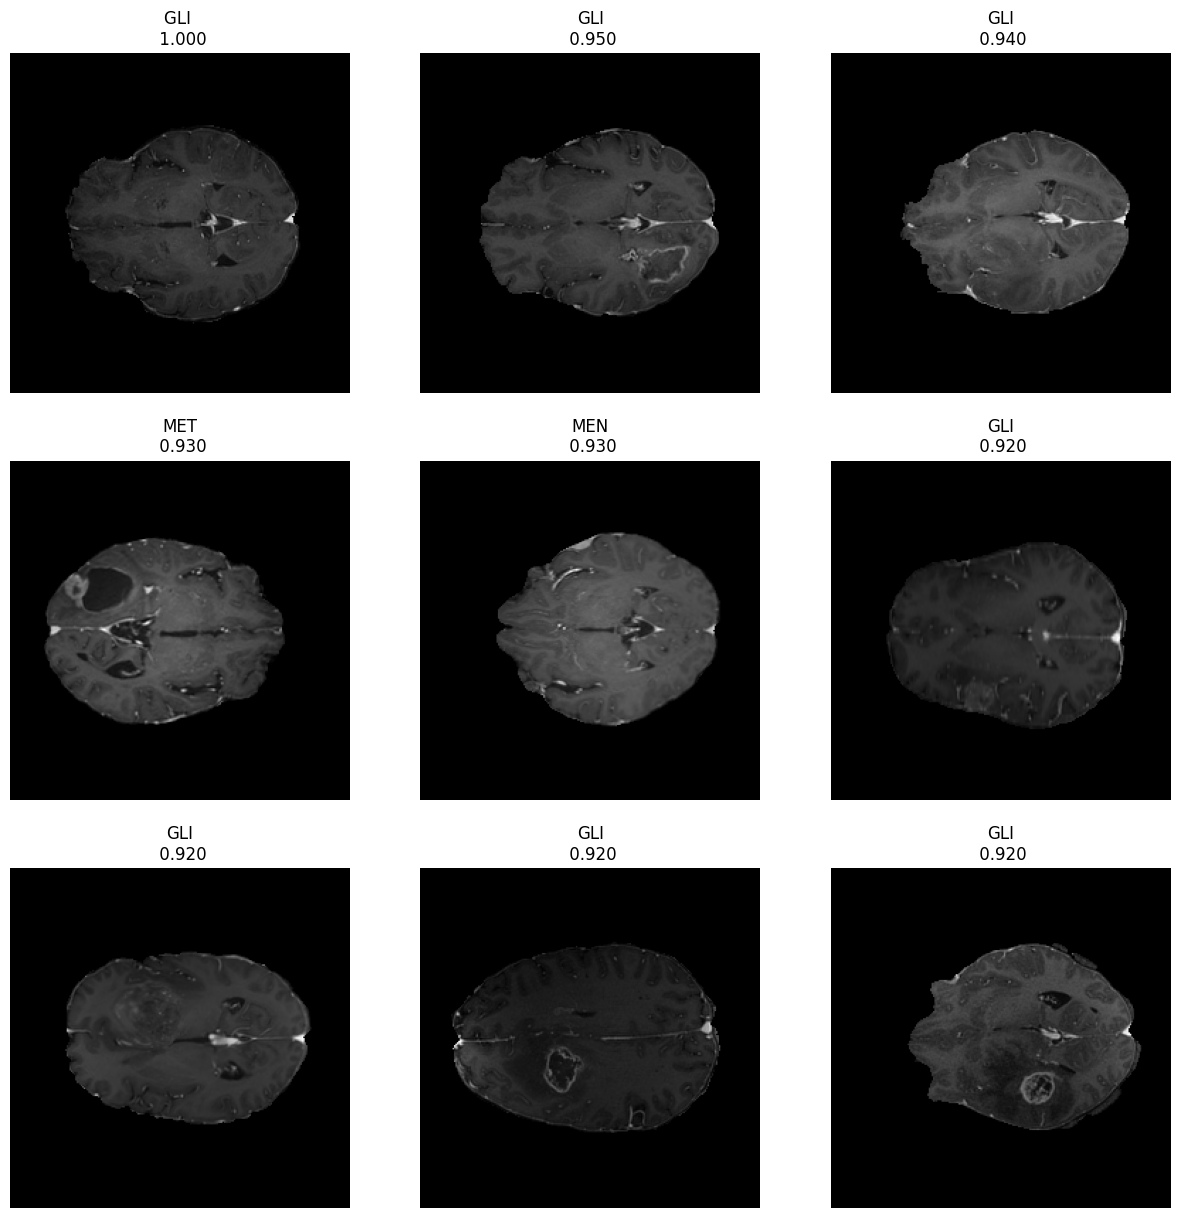

In [83]:

import skimage.io as io
import matplotlib.pyplot as plt

def get_label_from_path(image_path):
  return str(image_path.stem)[6:9]


def plot_neighborhood(neighbors_row):
  """
    This function allows us to visualize the 9 nearest neighbors of every image in
    the dataset.
    We see the cosine similarity between the query image and its neighbors
    in the title of each plot.
  """
  f, axarr = plt.subplots(3,3, figsize=(15,15))
  #import pdb; pdb.set_trace()

  label_0_0 = get_label_from_path(neighbors_row[0][0])
  axarr[0][0].imshow(io.imread(neighbors_row[0][0]))

  label_0_1 = get_label_from_path(neighbors_row[1][0])
  #import pdb; pdb.set_trace()
  axarr[0][1].imshow(io.imread(neighbors_row[1][0]))

  label_0_2 = get_label_from_path(neighbors_row[2][0])
  axarr[0][2].imshow(io.imread(neighbors_row[2][0]))

  label_1_0 = get_label_from_path(neighbors_row[3][0])
  axarr[1][0].imshow(io.imread(neighbors_row[3][0]))

  label_1_1 = get_label_from_path(neighbors_row[4][0])
  axarr[1][1].imshow(io.imread(neighbors_row[4][0]))

  label_1_2 = get_label_from_path(neighbors_row[5][0])
  axarr[1][2].imshow(io.imread(neighbors_row[5][0]))

  label_2_0 = get_label_from_path(neighbors_row[6][0])
  axarr[2][0].imshow(io.imread(neighbors_row[6][0]))

  label_2_1 =  get_label_from_path(neighbors_row[7][0])
  axarr[2][1].imshow(io.imread(neighbors_row[7][0]))

  label_2_2 =  get_label_from_path(neighbors_row[8][0])
  axarr[2][2].imshow(io.imread(neighbors_row[8][0]))
  #import pdb; pdb.set_trace()
  axarr[0, 0].set_title(f'{label_0_0} \n {neighbors_row[0][1]:.3f}')
  axarr[0, 1].set_title(f'{label_0_1}\n {neighbors_row[1][1]:.3f}')
  axarr[0, 2].set_title(f'{label_0_2}\n {neighbors_row[2][1]:.3f}')
  axarr[1, 0].set_title(f'{label_1_0}\n {neighbors_row[3][1]:.3f}')
  axarr[1, 1].set_title(f'{label_1_1}\n {neighbors_row[4][1]:.3f}')
  axarr[1, 2].set_title(f'{label_1_2}\n {neighbors_row[5][1]:.3f}')
  axarr[2, 0].set_title(f'{label_2_0}\n {neighbors_row[6][1]:.3f}')
  axarr[2, 1].set_title(f'{label_2_1}\n {neighbors_row[7][1]:.3f}')
  axarr[2, 2].set_title(f'{label_2_2}\n {neighbors_row[8][1]:.3f}')

  for i in range(3):
        for j in range(3):
            axarr[i, j].axis('off')

plot_neighborhood(neighborhoods_dict[images_with_full_path[42]])

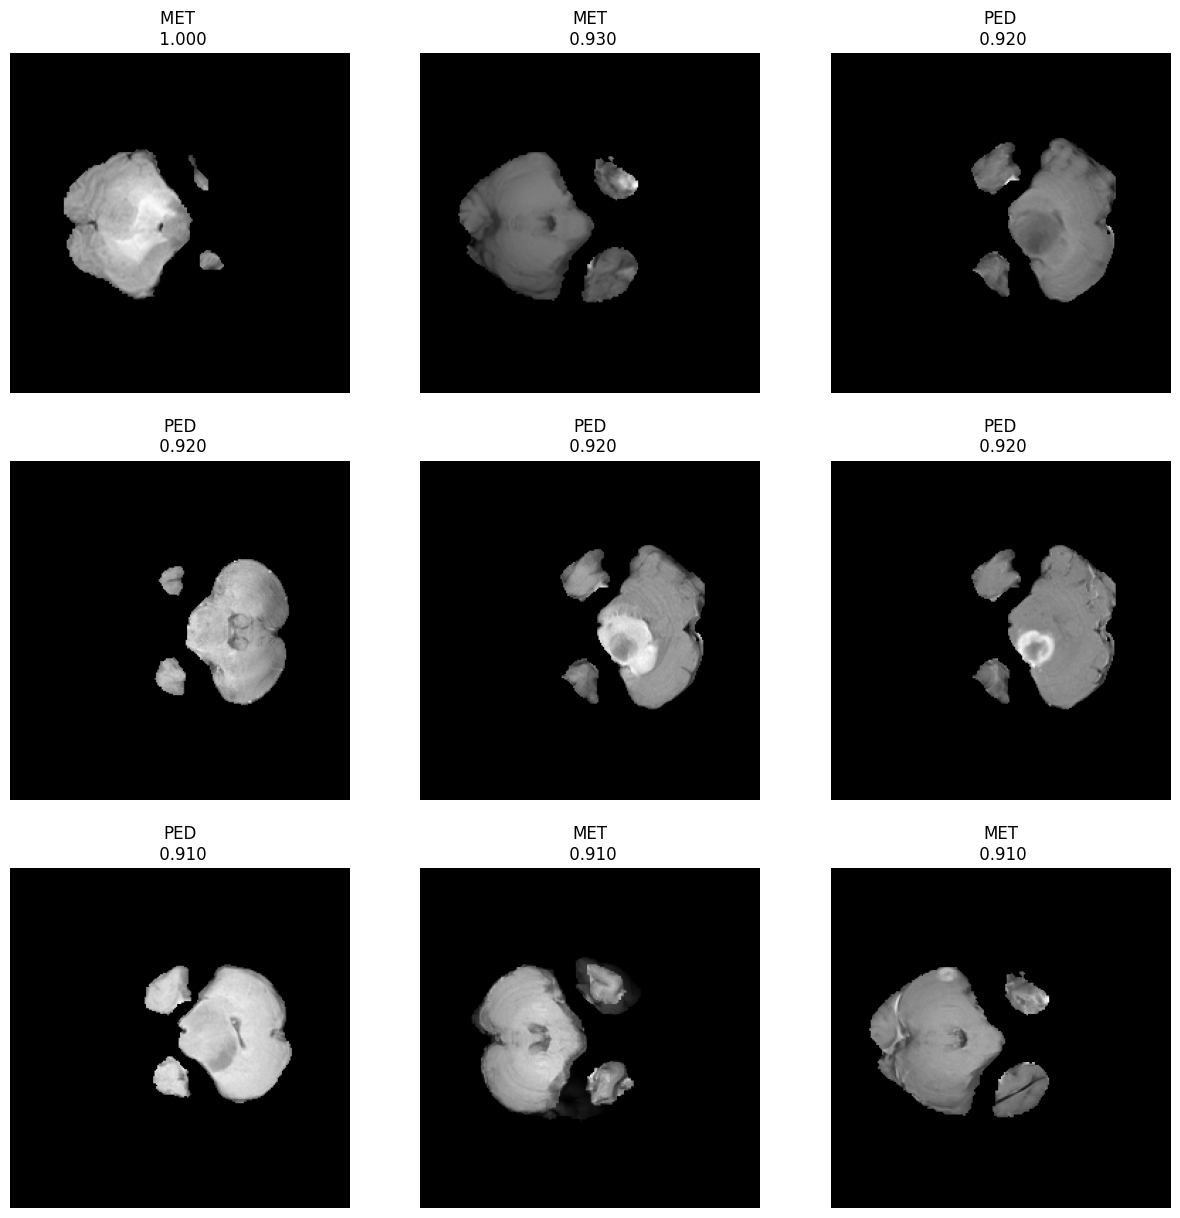

In [95]:
# @title {run:'auto'}

slider_value = 982  # @param {type: "slider", min: 0, max: 3663}
plot_neighborhood(neighborhoods_dict[images_with_full_path[slider_value]])
